# Hierarchical Clustering

In [83]:
import pandas as pd
import sklearn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings

In [2]:
data=pd.read_csv('airline_data.csv')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
data1=data.drop(['ID#','Award?'],axis=1)
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [4]:
data1.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000


## Normalising Data

In [5]:
transform= MinMaxScaler()
data2=pd.DataFrame(transform.fit_transform(data1))
data2

,0,1,2,3,4,5,6,7,8,9
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905
...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676


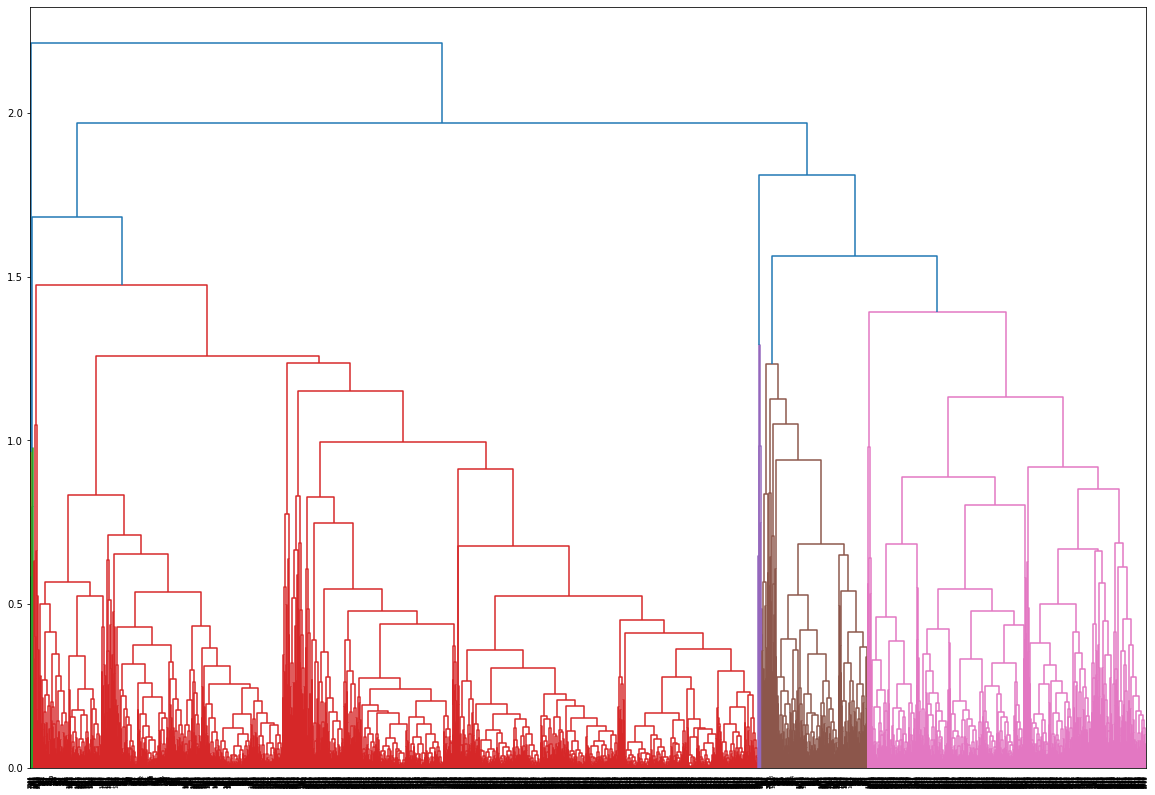

In [6]:
plt.figure(figsize=(20, 14))  
dendograms=sch.dendrogram(sch.linkage(data2,'complete'))

In [45]:
h_complete = AgglomerativeClustering(n_clusters=4, linkage='ward',affinity = "euclidean").fit(data2) 
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
data1['clust']=cluster_labels
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clust
0,28143,0,1,1,1,174,1,0,0,7000,1
1,19244,0,1,1,1,215,2,0,0,6968,1
2,41354,0,1,1,1,4123,4,0,0,7034,1
3,14776,0,1,1,1,500,1,0,0,6952,1
4,97752,0,4,1,1,43300,26,2077,4,6935,3
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,2
3995,64385,0,1,1,1,981,5,0,0,1395,2
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,2


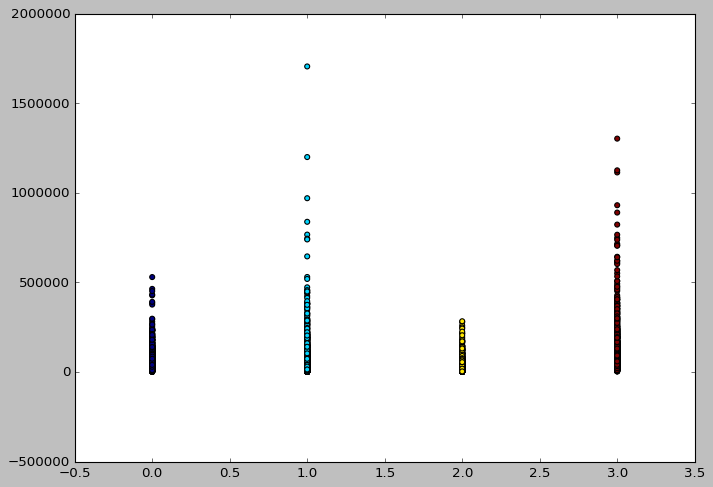

In [47]:
plt.figure(figsize=(10, 7))  
plt.scatter(data1['clust'],data1['Balance'], c=cluster_labels) 

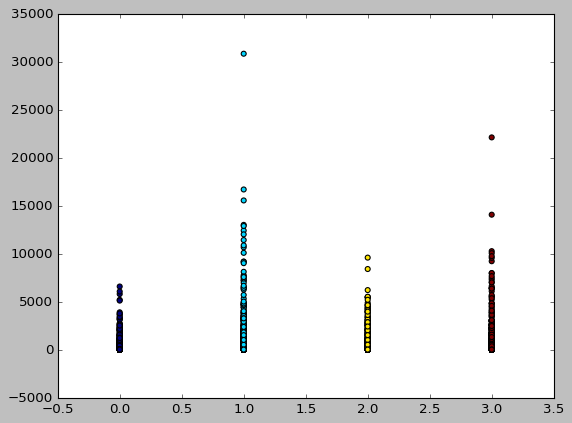

In [48]:
plt.scatter(data1['clust'],data1['Flight_miles_12mo'], c=cluster_labels) 

# KMeans

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

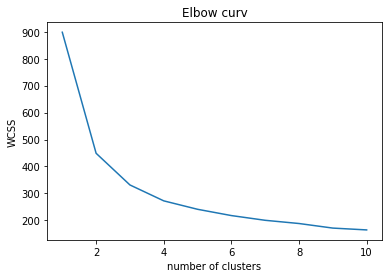

In [10]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow curv')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
model=KMeans(n_clusters=4)
model.fit(data2)
model.labels_
x=pd.DataFrame(model.labels_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
data3=data.copy()

data4=data3.drop(['ID#'],axis=1)

data5=data4.copy()
data5['Cluster']=x
data5

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,2


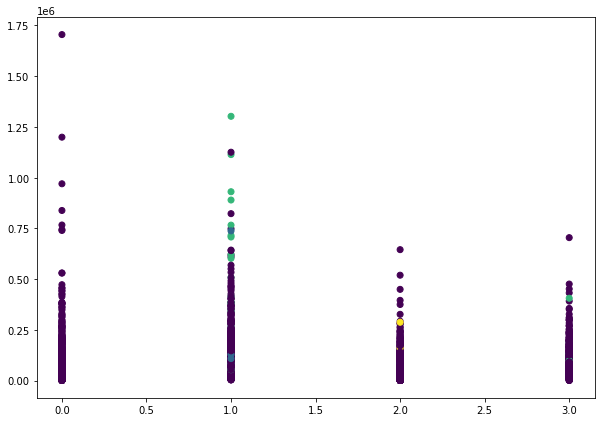

In [13]:
plt.figure(figsize=(10, 7))  
plt.scatter(data5['Cluster'],data5['Balance'], c=cluster_labels) 

# DBSCAN

In [14]:
data6=data4.copy()
df=data6.values

In [15]:
stscaler=StandardScaler().fit(df)
y=stscaler.transform(df)

In [16]:
dbscan=DBSCAN(eps=2,min_samples=12)
dbscan.fit(y)

DBSCAN(eps=2, min_samples=12)

In [17]:
d1=dbscan.labels_
d1

array([0, 0, 0, ..., 1, 0, 0])

In [18]:
sklearn.metrics.silhouette_score(y, d1) 

0.255303940580989

In [112]:
clf = KMeans(n_clusters=4)
y_kmeans = clf.fit_predict(y)

In [113]:
a=pd.DataFrame(y_kmeans)
data6['Cluster_Value']=a
data6

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster Value,Cluster_Value
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,0


In [114]:
sklearn.metrics.silhouette_score(y,y_kmeans) 

0.30954596647693405

In [115]:
>>> plt.style.use('classic')   

Text(0.5, 1.0, 'Clusters using DBSCAN')

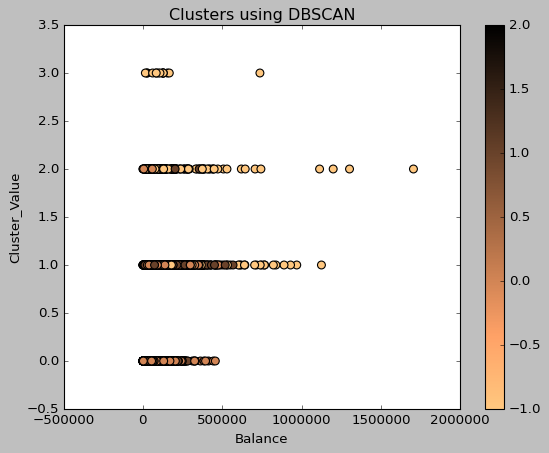

In [116]:
data6.plot(x="Balance",y ="Cluster_Value",c=d1 ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBSCAN')  

Text(0.5, 1.0, 'Clusters using KMeans')

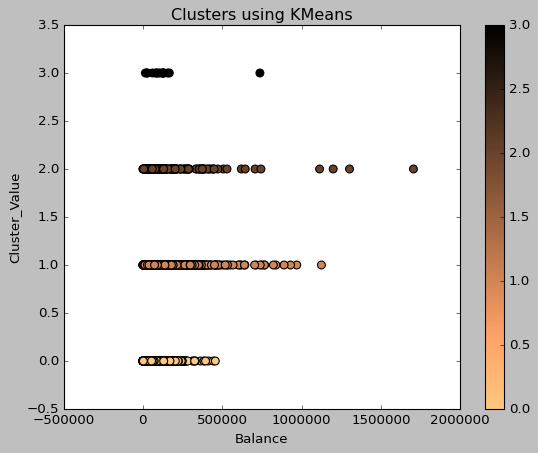

In [117]:
data6.plot(x="Balance",y ="Cluster_Value",c=y_kmeans ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using KMeans')

## We have used 3 methods 


1.   Agglomerative Clustering
2.   K Means
3. DBSCAN

---


### Comparing the cluster value of each with other variables

In [118]:
data1.groupby(['clust']).count()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
clust,,,,,,,,,,
0,873,873,873,873,873,873,873,873,873,873
1,1416,1416,1416,1416,1416,1416,1416,1416,1416,1416
2,885,885,885,885,885,885,885,885,885,885
3,825,825,825,825,825,825,825,825,825,825


Text(0.5, 1.0, 'Number of clusters of Aglomerative Clustering')

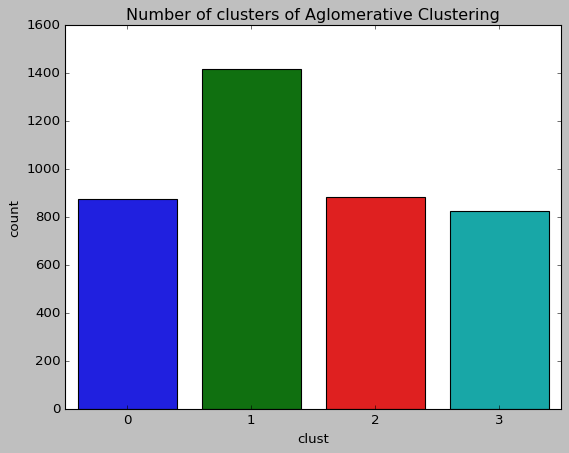

In [119]:
sns.countplot(data1['clust'])
warnings.filterwarnings("ignore")
plt.title('Number of clusters of Aglomerative Clustering')

Maximum number of clients are in number 1 cluster 
hence let us analyze the cluster by its average values in it.


In [120]:
ana_clust=pd.DataFrame(data1.loc[data1.clust==1].mean(),columns=['Values'])
ana_clust

,Values
Balance,62223.716808
Qual_miles,234.064972
cc1_miles,1.019774
cc2_miles,1.040254
cc3_miles,1.002119
Bonus_miles,4402.119350
Bonus_trans,6.608757
Flight_miles_12mo,527.386299
Flight_trans_12,1.600282
Days_since_enroll,5033.024718


In [121]:
data5.groupby(['Cluster']).count()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster,,,,,,,,,,,
0,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168
1,747,747,747,747,747,747,747,747,747,747,747
2,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405
3,679,679,679,679,679,679,679,679,679,679,679


Text(0.5, 1.0, 'Number of clusters of Kmeans')

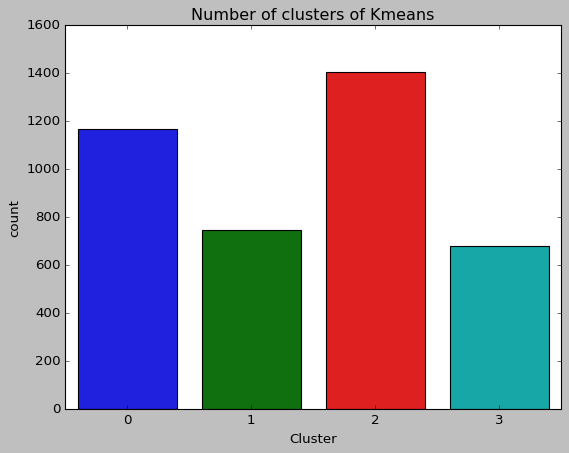

In [122]:
sns.countplot(data5['Cluster'])
warnings.filterwarnings("ignore")
plt.title('Number of clusters of Kmeans')

In [123]:
ana_clust_k_1=pd.DataFrame(data5.loc[data5.Cluster==0].mean(),columns=['Values'])
ana_clust_k_1

,Values
Balance,65943.404966
Qual_miles,171.380993
cc1_miles,1.128425
cc2_miles,1.023116
cc3_miles,1.005993
Bonus_miles,5185.728596
Bonus_trans,8.013699
Flight_miles_12mo,488.767979
Flight_trans_12,1.497432
Days_since_enroll,5753.320205


In [124]:
ana_clust_k_2=pd.DataFrame(data5.loc[data5.Cluster==2].mean(),columns=['Values'])
ana_clust_k_2

,Values
Balance,40342.787189
Qual_miles,121.339502
cc1_miles,1.095374
cc2_miles,1.020641
cc3_miles,1.004982
Bonus_miles,4453.488256
Bonus_trans,7.162278
Flight_miles_12mo,394.088968
Flight_trans_12,1.156584
Days_since_enroll,2198.788612


In [125]:
data6.groupby(['Cluster_Value']).count()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster Value
Cluster_Value,,,,,,,,,,,,
0,2549,2549,2549,2549,2549,2549,2549,2549,2549,2549,2549,2549
1,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275,1275
2,160,160,160,160,160,160,160,160,160,160,160,160
3,15,15,15,15,15,15,15,15,15,15,15,15


Text(0.5, 1.0, 'Number of clusters of DSCAN')

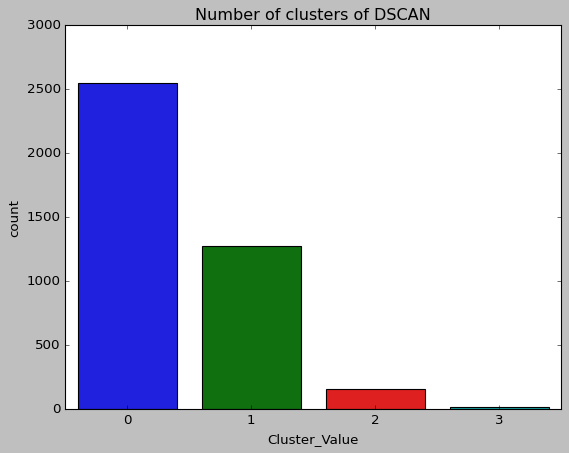

In [126]:
sns.countplot(data6['Cluster_Value'])
warnings.filterwarnings("ignore")
plt.title('Number of clusters of DSCAN')

In [130]:
ana_clust_db=pd.DataFrame(data6.loc[data6.Cluster_Value==0].mean(),columns=['Values'])
ana_clust_db

,Values
Balance,43847.088662
Qual_miles,97.207532
cc1_miles,1.223617
cc2_miles,1.019223
cc3_miles,1.000392
Bonus_miles,4712.054923
Bonus_trans,6.935269
Flight_miles_12mo,201.665359
Flight_trans_12,0.626128
Days_since_enroll,3695.929384


In [132]:
con=pd.concat([ana_clust,ana_clust_k_1,ana_clust_k_2,ana_clust_db],axis=1)
con

,Values,Values,Values,Values
Balance,62223.716808,65943.404966,40342.787189,43847.088662
Qual_miles,234.064972,171.380993,121.339502,97.207532
cc1_miles,1.019774,1.128425,1.095374,1.223617
cc2_miles,1.040254,1.023116,1.020641,1.019223
cc3_miles,1.002119,1.005993,1.004982,1.000392
Bonus_miles,4402.119350,5185.728596,4453.488256,4712.054923
Bonus_trans,6.608757,8.013699,7.162278,6.935269
Flight_miles_12mo,527.386299,488.767979,394.088968,201.665359
Flight_trans_12,1.600282,1.497432,1.156584,0.626128
Days_since_enroll,5033.024718,5753.320205,2198.788612,3695.929384


## Hence the highest number of customer are from

1.   Number of miles eligible for award travel-**40000-65000**
2.   Number of miles counted as qualifying for Topflight status- in a range of **100-200**
3.   cc1,cc2,cc3 miles=**1**
4.   Number of miles earned from non-flight bonus transactions in the past 12 months in a range of **44000-50000**
5.   Number of flight transactions in the past 12 months for around **1-2** times


> ## **Above are the group of passengers of the Airline which need to be focused on the most**



